This dataset was obtained from Kaggle Mercedes-Benz Greener Manufacturing competition. Dataset can be obtained from:
https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing/overview

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

The goal of this competition was to predict the time taken by cars on the test bench. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pooja\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pooja\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\pooja\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
train = pd.read_csv('train.csv.zip') # load in training data

In [4]:
train.shape

(4209, 378)

In [5]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


From above, it can be seen that there are 4209 rows of data with 378 columns. The target value, y is the time in seconds taken by a car on production line to pass a test. The ID is appears to have been given randomly, instead of being equal to the row ID.

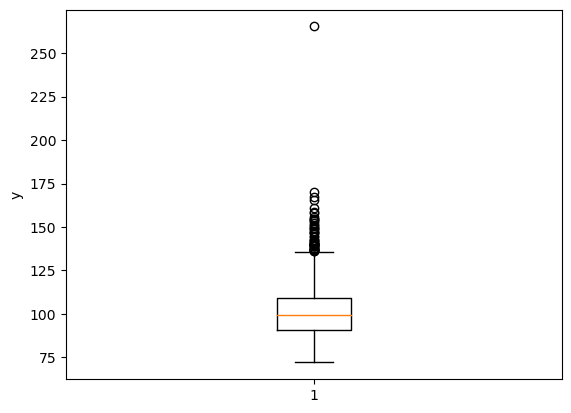

In [6]:
# plot distribution of train data

plt.figure()
plt.boxplot(train["y"])
plt.ylabel("y")
plt.show()

From the plot above, the dataset appears to be skewed with many outliers on the target value

In [12]:
sns.set_palette('pastel')

In [26]:
cols = [c for c in train.columns if 'X' in c]

# check features with different number of unique values
counts = [[], [], []]
for c in cols:
    typ = train[c].dtype
    uniq = len(np.unique(train[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

In [27]:
print('Constant Features :', counts[0])

Constant Features : ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


There are 12 features which have single values for each column. These would be useless for a supervised learning algorithm and could probably be dropped.

In [28]:
print('Binary Features :', counts[1])

Binary Features : ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147', 'X148', 'X1

In [29]:
len(counts[1])

356

In [30]:
print('Categorical Features :', counts[2])

Categorical Features : ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


From above, it can be seen that most features in the dataset are binary features. There are approximately 8 categorical features in the dataset.

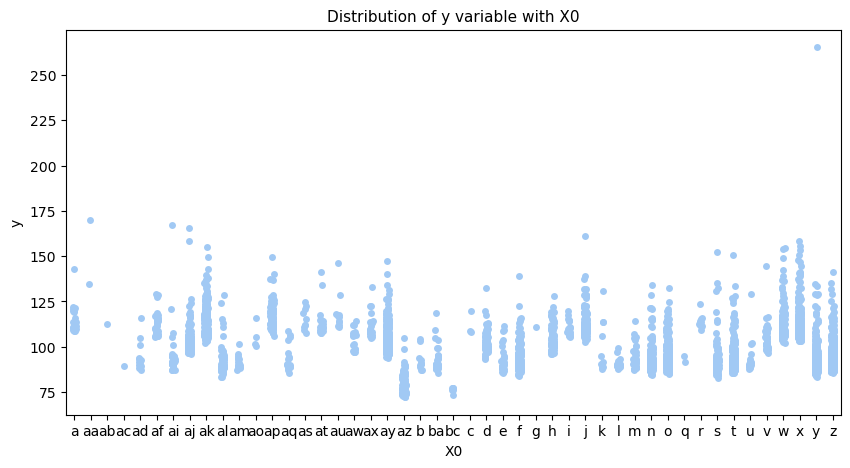

In [14]:
var="X0"
colu_order=np.sort(train[var].unique()).tolist()
plt.figure(figsize=(10, 5))
sns.stripplot(x=var,y="y",data=train,order=colu_order)
plt.xlabel(var,fontsize=10)
plt.ylabel("y",fontsize=10)
plt.title("Distribution of y variable with "+var, fontsize=11)
plt.show()

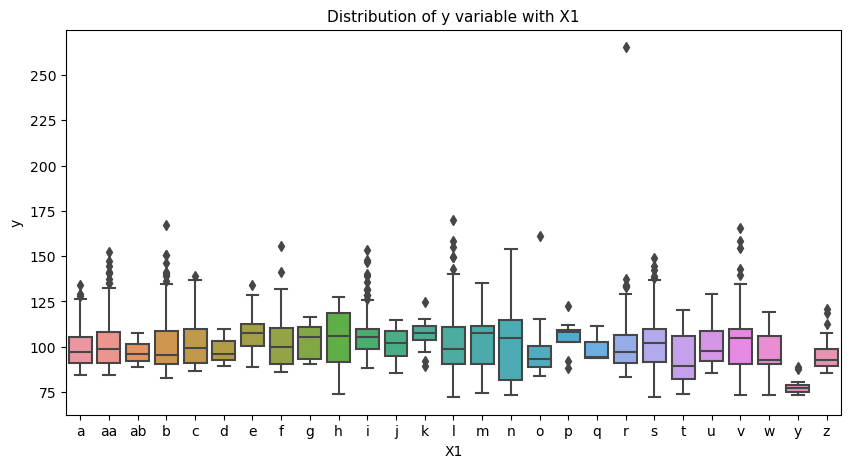

In [15]:
var="X1"
colu_order=np.sort(train[var].unique()).tolist()
plt.figure(figsize=(10, 5))
sns.boxplot(x=var,y="y",data=train,order=colu_order)
plt.xlabel(var,fontsize=10)
plt.ylabel("y",fontsize=10)
plt.title("Distribution of y variable with "+var, fontsize=11)
plt.show()

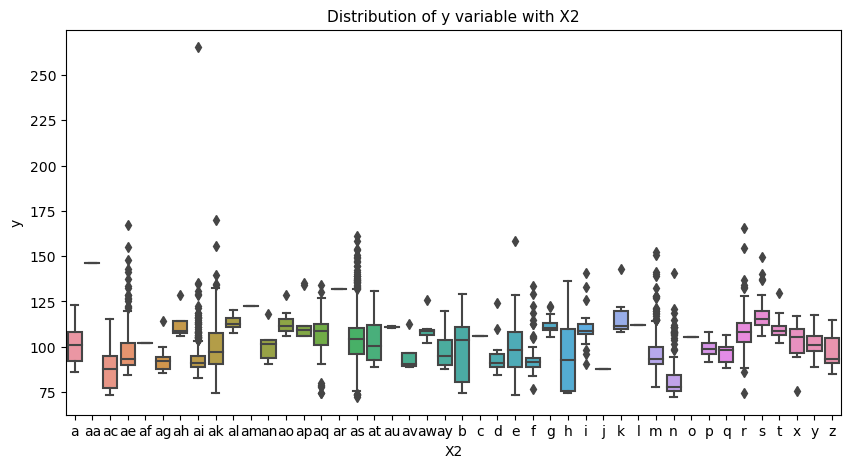

In [17]:
var="X2"
colu_order=np.sort(train[var].unique()).tolist()
plt.figure(figsize=(10, 5))
sns.boxplot(x=var,y="y",data=train,order=colu_order)
plt.xlabel(var,fontsize=10)
plt.ylabel("y",fontsize=10)
plt.title("Distribution of y variable with "+var, fontsize=11)
plt.show()

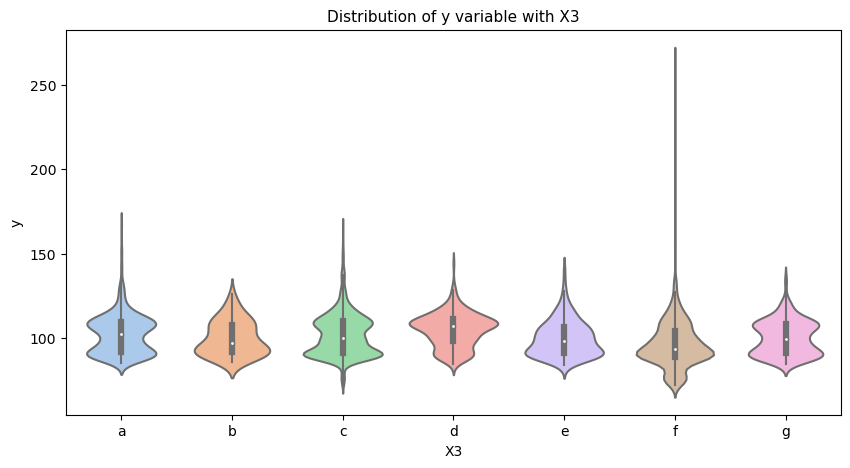

In [18]:
var="X3"
colu_order=np.sort(train[var].unique()).tolist()
plt.figure(figsize=(10, 5))
sns.violinplot(x=var,y="y",data=train,order=colu_order)
plt.xlabel(var,fontsize=10)
plt.ylabel("y",fontsize=10)
plt.title("Distribution of y variable with "+var, fontsize=11)
plt.show()

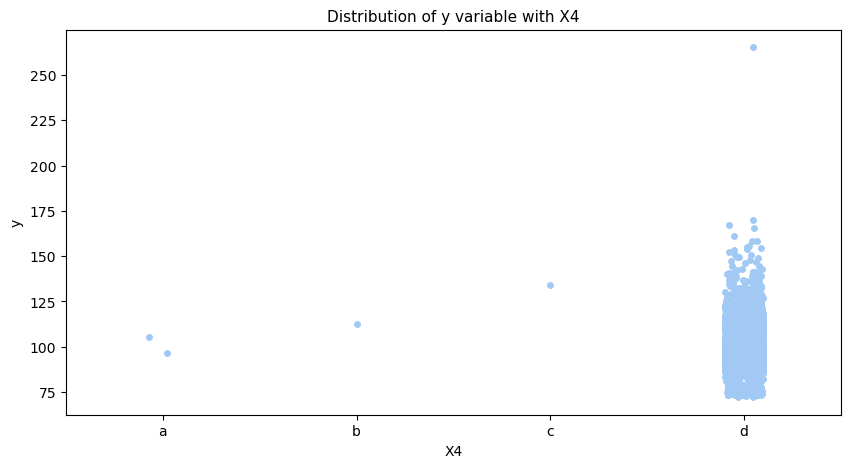

In [19]:
var="X4"
colu_order=np.sort(train[var].unique()).tolist()
plt.figure(figsize=(10, 5))
sns.stripplot(x=var,y="y",data=train,order=colu_order)
plt.xlabel(var,fontsize=10)
plt.ylabel("y",fontsize=10)
plt.title("Distribution of y variable with "+var, fontsize=11)
plt.show()

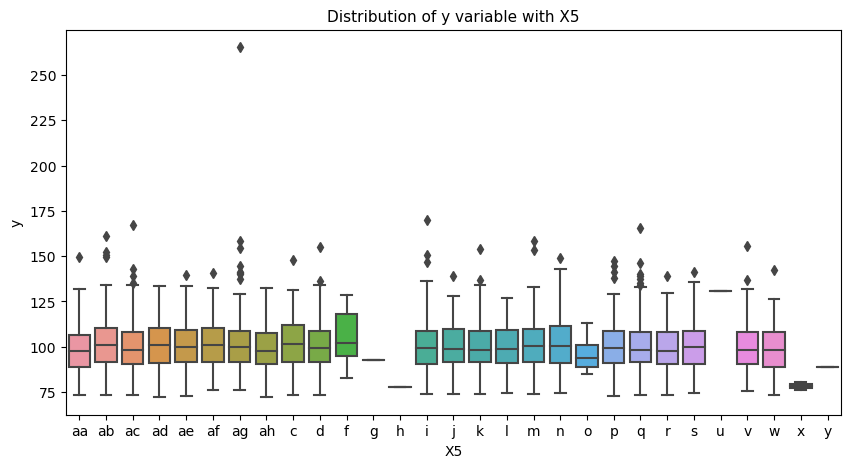

In [21]:
var="X5"
colu_order=np.sort(train[var].unique()).tolist()
plt.figure(figsize=(10, 5))
sns.boxplot(x=var,y="y",data=train,order=colu_order)
plt.xlabel(var,fontsize=10)
plt.ylabel("y",fontsize=10)
plt.title("Distribution of y variable with "+var, fontsize=11)
plt.show()

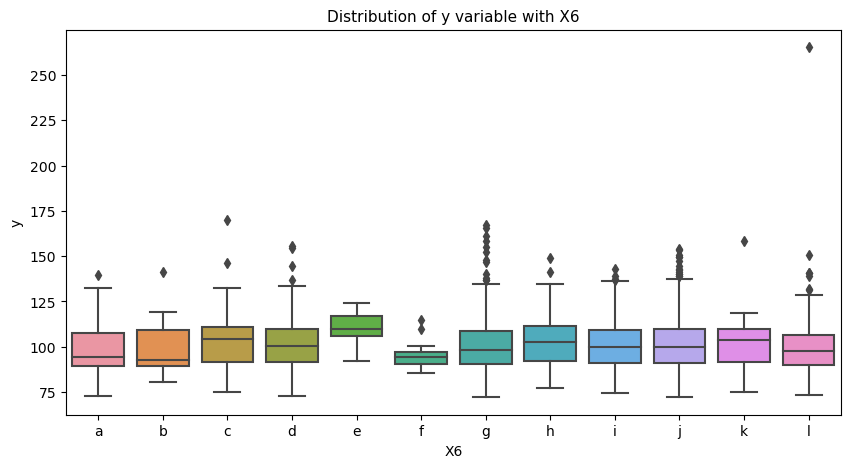

In [22]:
var="X6"
colu_order=np.sort(train[var].unique()).tolist()
plt.figure(figsize=(10, 5))
sns.boxplot(x=var,y="y",data=train,order=colu_order)
plt.xlabel(var,fontsize=10)
plt.ylabel("y",fontsize=10)
plt.title("Distribution of y variable with "+var, fontsize=11)
plt.show()

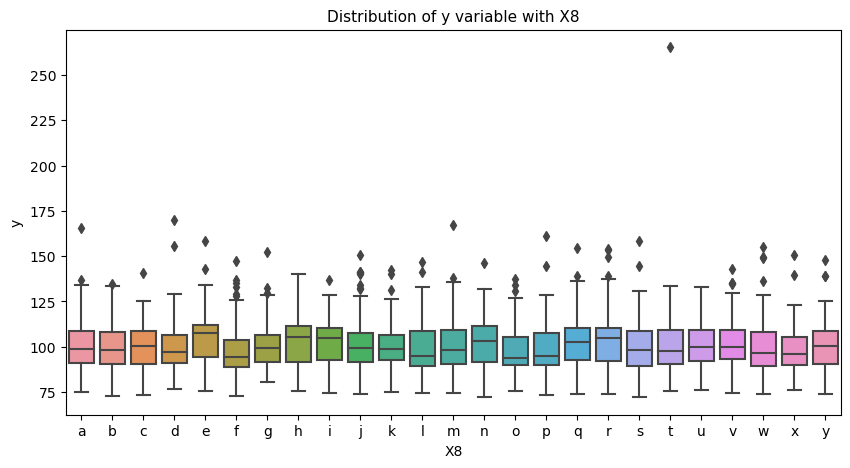

In [24]:
var="X8"
colu_order=np.sort(train[var].unique()).tolist()
plt.figure(figsize=(10, 5))
sns.boxplot(x=var,y="y",data=train,order=colu_order)
plt.xlabel(var,fontsize=10)
plt.ylabel("y",fontsize=10)
plt.title("Distribution of y variable with "+var, fontsize=11)
plt.show()

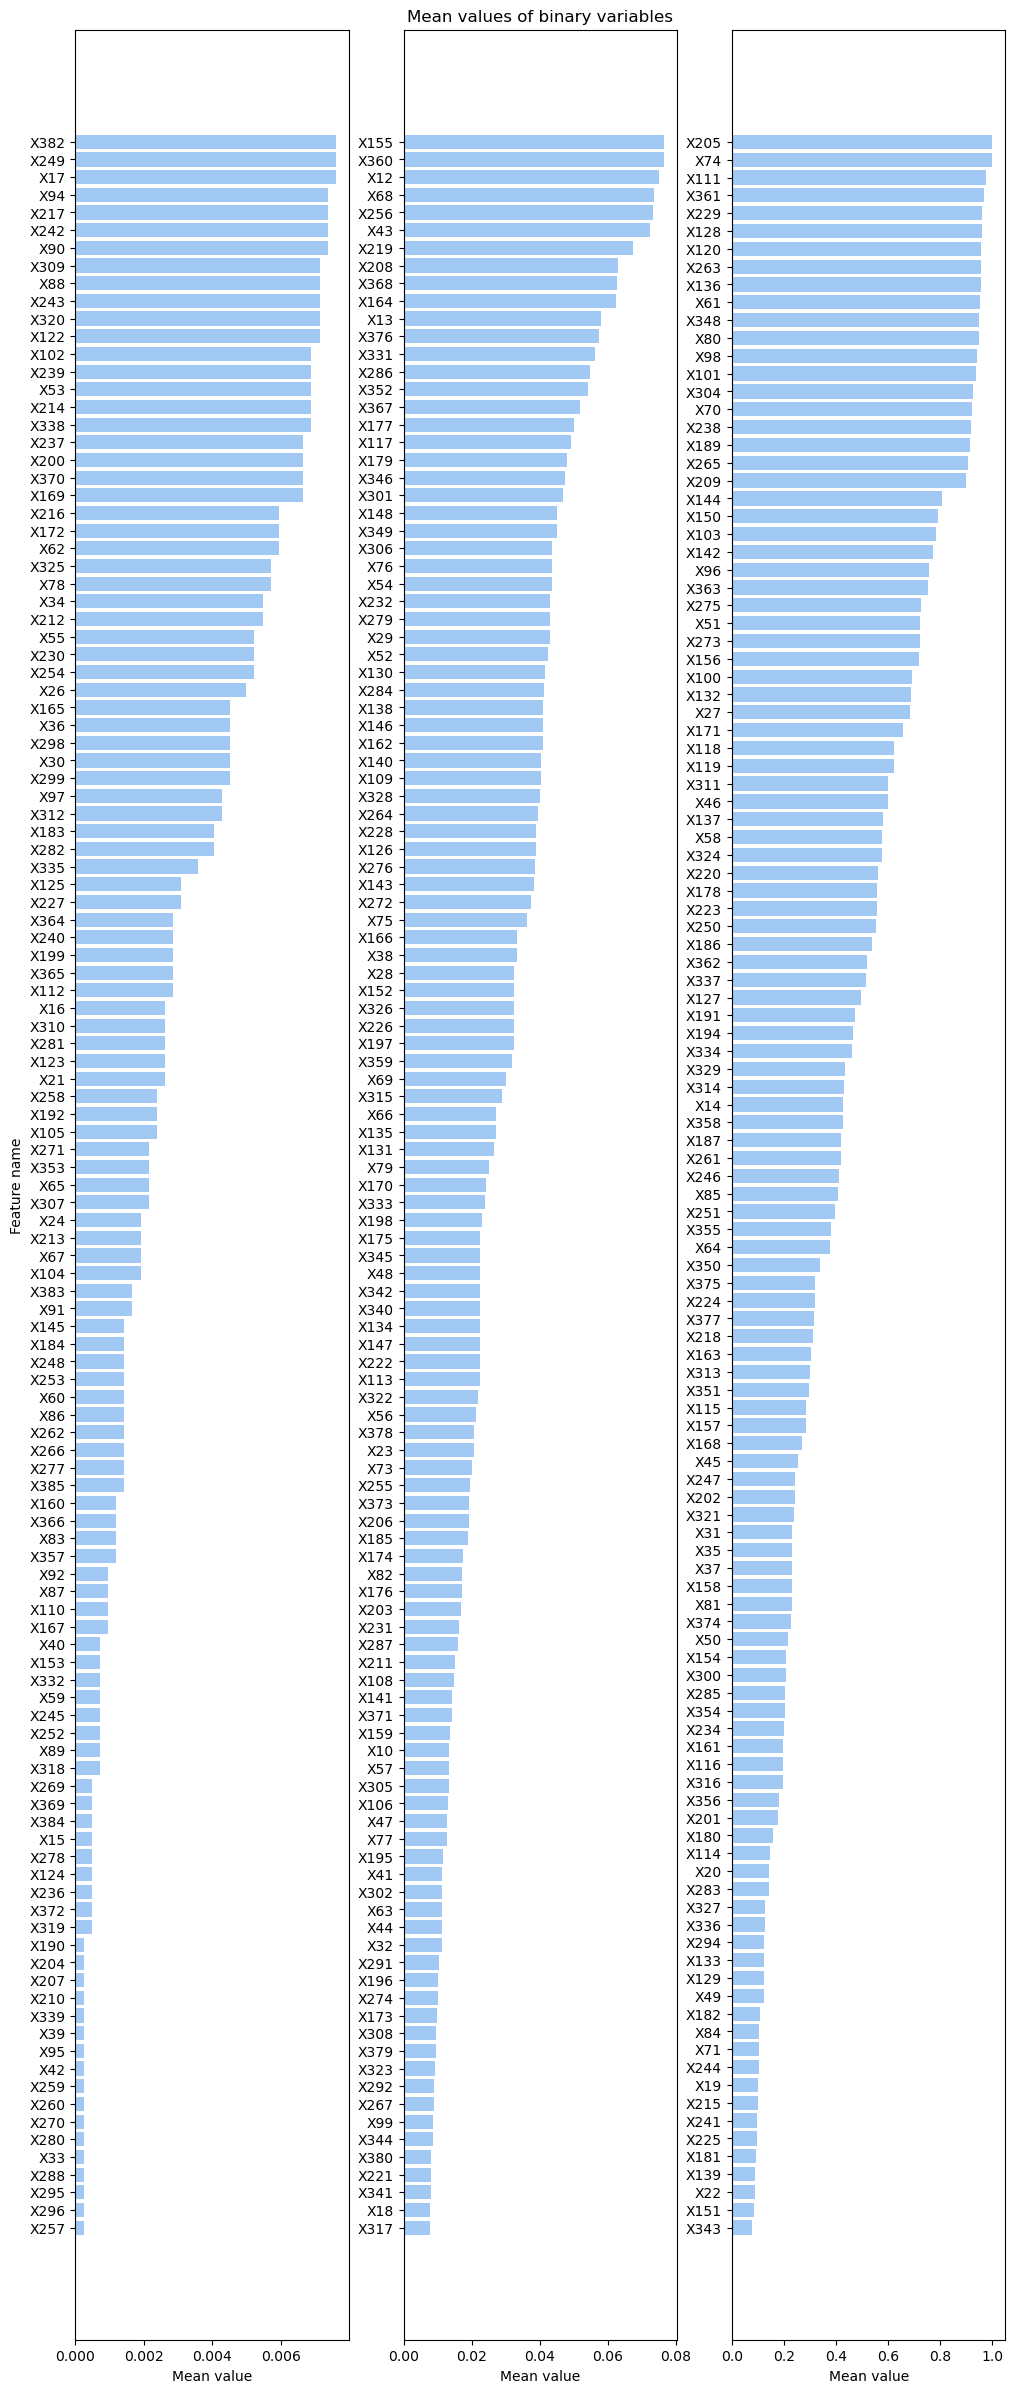

In [31]:
binary_means = [np.mean(train[c]) for c in counts[1]]
binary_names = np.array(counts[1])[np.argsort(binary_means)]
binary_means = np.sort(binary_means)

fig, ax = plt.subplots(1, 3, figsize=(12,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_names[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means)
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()


In [32]:
y_train = train['y']

In [33]:
X_train = train.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis = 1)

In [39]:
for col in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
    X_train[col] = X_train[col].astype('category')

In [46]:
import sklearn

# label encoding the categorical columns
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = sklearn.preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values)) 
        X_train[f] = lbl.transform(list(X_train[f].values))

In [51]:
X_train = X_train.drop(['ID'], axis = 1)

In [53]:
X_train = X_train.drop(['y'], axis = 1)

## Predictions using the XGBoost model

In [56]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# splitting training dataset into training and validation data
x_train_data, valid_data, y_train_data, y_valid_data = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

d_train = xgb.DMatrix(x_train_data, label=y_train_data)
d_valid = xgb.DMatrix(valid_data, label=y_valid_data)

# setting xgboost model parameters
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.01
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

# training xgboost model
clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[18:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:100.05647	train-r2:-61.04310	valid-rmse:99.60729	valid-r2:-61.77577
[10]	train-rmse:90.57422	train-r2:-49.84080	valid-rmse:90.14273	valid-r2:-50.41279
[20]	train-rmse:82.00482	train-r2:-40.67561	valid-rmse:81.58889	valid-r2:-41.11839


C:\Users\pooja\anaconda3\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[30]	train-rmse:74.26189	train-r2:-33.17710	valid-rmse:73.85947	valid-r2:-33.51614
[40]	train-rmse:67.26732	train-r2:-27.04216	valid-rmse:66.87632	valid-r2:-27.29792
[50]	train-rmse:60.95056	train-r2:-22.02283	valid-rmse:60.56908	valid-r2:-22.21195
[60]	train-rmse:55.24792	train-r2:-17.91625	valid-rmse:54.87423	valid-r2:-18.05227
[70]	train-rmse:50.10183	train-r2:-14.55644	valid-rmse:49.73447	valid-r2:-14.65038
[80]	train-rmse:45.46030	train-r2:-11.80760	valid-rmse:45.09790	valid-r2:-11.86834
[90]	train-rmse:41.27631	train-r2:-9.55857	valid-rmse:40.92094	valid-r2:-9.59500
[100]	train-rmse:37.50731	train-r2:-7.71836	valid-rmse:37.15846	valid-r2:-7.73625
[110]	train-rmse:34.11493	train-r2:-6.21261	valid-rmse:33.77448	valid-r2:-6.21750
[120]	train-rmse:31.06456	train-r2:-4.98045	valid-rmse:30.73030	valid-r2:-4.97508
[130]	train-rmse:28.32505	train-r2:-3.97215	valid-rmse:27.99556	valid-r2:-3.95893
[140]	train-rmse:25.86827	train-r2:-3.14704	valid-rmse:25.54231	valid-r2:-3.12791
[150]	train

## Predictions using the RandomForestRegressor model

In [55]:
from sklearn import ensemble

# apply random forest model on train data
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(x_train_data, y_train_data)

RandomForestRegressor(max_depth=10, max_features=0.2, min_samples_leaf=4,
                      n_estimators=200, n_jobs=-1, random_state=0)

In [57]:
pred_train = model.predict(x_train_data)
r2_score(y_train_data, pred_train) # get r2 score for train data predictions

0.6421353914294288

In [58]:
pred_valid = model.predict(valid_data) # apply random forest model on validation data
r2_score(y_valid_data, pred_valid) # get r2 score for validation data predictions

0.5694311789526556